<a href="https://colab.research.google.com/github/priyashah23/dissertation-reddit-controversy/blob/main/TF_IDF_%2B_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw
!pip install asyncpraw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import praw
import asyncpraw

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Obtain data from Reddit's API

In [ ]:
from google.colab import userdata

In [ ]:
reddit = praw.Reddit(
    client_id = userdata.get('client_user'),
    client_secret = userdata.get('client_secret'),
    user_agent = "TestApp/0.0.1 by priawesome123"
)
print(reddit.read_only)

True


# Obtain posts from the last week of Movies

In [ ]:
posts = []

subreddit = await reddit.subreddit("movies", fetch=True)

async for submission in subreddit.controversial(limit=1000, time_filter="week"):
    posts.append({'submission_id': submission.id,
                  'submission_title': submission.title,
                  'submission_author' : submission.author,
                  'submission_created': submission.created_utc,
                  'submission_score': submission.score,
                  'upvote_ratio': submission.upvote_ratio,
                  'num_comments': submission.num_comments})

df = pd.DataFrame(posts)
df.to_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/movies_domain_transfer.csv', mode='a', index=False, header=True)
df

,submission_id,submission_title,submission_author,submission_created,submission_score,upvote_ratio,num_comments
0,1biffpa,Poor things ending questions,Green_Space729,1.710837e+09,0,0.50,24
1,1bj9mmw,Should I give up?,BoyCreep07,1.710928e+09,0,0.49,50
2,1bjr8yy,So I watched Bladerunner 1982 and I'm a little...,TokkiJK,1.710976e+09,0,0.46,21
3,1bfjacj,NSFW: What were the best or your favorite 'Ski...,today_okay,1.710523e+09,2,0.52,26
4,1biuzve,Adding to the Poor Things (2023) appreciation,DontBrainMyDamage,1.710882e+09,23,0.58,60
...,...,...,...,...,...,...,...
710,1bfo774,I often find females in tough action roles to ...,Swimswiy400,1.710536e+09,0,0.08,20
711,1bhp1ay,Imagine if there would have been a post credit...,Infinite_Parking_800,1.710763e+09,0,0.07,4
712,1birh9v,Cillian Murphy just plays Tommy Shelby in Oppe...,ak22801,1.710873e+09,0,0.06,24
713,1bhijzg,What were films that had misleading trailers/a...,methodwriter85,1.710737e+09,0,0.24,23


In [ ]:
posts_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/movies_domain_transfer.csv')

In [ ]:
import time

In [ ]:
reddit.auth.limits

{'remaining': None, 'reset_timestamp': None, 'used': None}

In [ ]:
comments_list = []
for submission in posts_df['submission_id'][0:100]:
    post = await reddit.submission(submission)
    comments = await post.comments()
    await comments.replace_more(limit=100)
    all_comments = await comments.list()
    for comment in all_comments:
      comments_list.append({'comment_id': comment.id,
                        'comment_body': comment.body,
                        'comment_author': comment.author,
                        'comment_created': comment.created_utc,
                        'comment_score': comment.score,
                        'comment_created_utc' : comment.created_utc,
                        'comment_link_id': comment.link_id})
df_comments = pd.DataFrame(comments_list)
df_comments.to_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/movies_domain_transfer_comments.csv', mode='a', index=False, header=True)
df_comments

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7b35b6377dc0>
ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7b35b6375db0>


RequestException: error with request [Errno 104] Connection reset by peer

Obtain posts from the subreddit r/gaming in the past 24 hours and save them to a csv file

In [ ]:
posts = []
for submission in reddit.subreddit("gaming").controversial(limit=1000, time_filter="day"):
    posts.append({'submission_id': submission.id,
                  'submission_title': submission.title,
                  'submission_author' : submission.author,
                  'submission_created': submission.created_utc,
                  'submission_score': submission.score,
                  'upvote_ratio': submission.upvote_ratio,
                  'num_comments': submission.num_comments})

df = pd.DataFrame(posts)
df.to_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/new_controversial_posts.csv', mode='a', index=False, header=True)
df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,submission_id,submission_title,submission_author,submission_created,submission_score,upvote_ratio,num_comments
0,1ba4kqo,What’s an amazing game that you completed once...,lordkinsanity,1.709945e+09,16,0.57,143
1,1ba1fqy,Nintendo NES,1heavyarms3,1.709937e+09,0,0.50,26
2,1baa8d0,100k gamerscore!!,No_Leader_2711,1.709962e+09,0,0.47,4
3,1ba2oe4,This is What 1000 Hours of Max Payne 3 Looks Like,TheMotion,1.709940e+09,0,0.42,13
4,1b9xr8t,What would the gaming equivalent of the Darwin...,LionOfWise,1.709928e+09,0,0.44,15
...,...,...,...,...,...,...,...
62,1ba082s,STRANGER THINGS,AutomaticMan81,1.709934e+09,0,0.16,9
63,1bachuc,The Saboteur is back on steam after 9 years!,Realbanie,1.709971e+09,244,0.94,43
64,1ba3027,Cash Bandiloot seems...familiar.,Cryozenic,1.709941e+09,804,0.97,29
65,1b9nlo8,Akira Toriyama's easter egg for his two childr...,LordLoko,1.709904e+09,2849,0.98,42


Obtain comments from the posts obtained above and store them in a csv file

In [ ]:
comments = []
for submission in posts:
    submission_id = submission['submission_id']
    post = reddit.submission(submission_id)
    post.comments.replace_more(limit=100)
    for comment in post.comments.list():
        comments.append({'comment_id': comment.id,
                         'comment_body': comment.body,
                         'comment_author': comment.author,
                         'comment_created': comment.created_utc,
                         'comment_score': comment.score,
                         'comment_created_utc' : comment.created_utc,
                         'comment_link_id': comment.link_id})

df_comments = pd.DataFrame(comments)
df_comments.to_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/new_controversial_comments.csv', mode='a', index=False, header=False)
df_comments

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,comment_id,comment_body,comment_author,comment_created,comment_score,comment_created_utc,comment_link_id
0,ku05buf,Subnautica. Granted I only completed it last y...,ory1994,1.709946e+09,18,1.709946e+09,t3_1ba4kqo
1,ku0bbgv,Witcher 3. I feel like if I went back I should...,inquisitiveauthor,1.709949e+09,16,1.709949e+09,t3_1ba4kqo
2,ku07mtp,Almost every GTA\nI try to do everything in it...,Nomi_0071,1.709947e+09,13,1.709947e+09,t3_1ba4kqo
3,ku07nth,All of the Uncharted games. They have great st...,xrp671z06,1.709947e+09,20,1.709947e+09,t3_1ba4kqo
4,ku08a1l,"Max Payne 3. Really need to, but got so many o...",AllStarSuperman_,1.709948e+09,7,1.709948e+09,t3_1ba4kqo
...,...,...,...,...,...,...,...
8950,ku242lf,Red dead redemption: undead nightmare was a go...,Raccooncola,1.709984e+09,1,1.709984e+09,t3_1baegqq
8951,ku248pe,If it didn't have to be first or third person ...,OranBerryPie,1.709985e+09,1,1.709985e+09,t3_1baegqq
8952,ku27q0c,"7 days to die, one of the best zombie games ar...",mikej83,1.709987e+09,1,1.709987e+09,t3_1baegqq
8953,ku2127c,Praying this somehow comes to xb,8hook0ne8,1.709983e+09,1,1.709983e+09,t3_1baegqq


## Data Preprocessing

In [ ]:
post_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/labelled_controversial_posts_final.csv')
post_df.head()

,submission_id,submission_title,submission_author,submission_created,submission_score,upvote_ratio,num_comments,is_controversial
0,19f5823,Where were you when the GTA 6 trailer dropped ...,ODB95,1.706174e+09,0,0.02,71,1
1,19dzivz,How are Nintendo and Square Enix not suing the...,shifty_coder,1.706045e+09,0,0.06,118,1
2,19e7f8g,Palworld or Valheim,GalexyGoose,1.706067e+09,0,0.06,21,1
3,1acnwhp,"Is the Palworld situation comparable, in a way...",stronkzer,1.706397e+09,0,0.06,21,1
4,19eqdo1,"Given the recent unfortunate discourse, I want...",LokiLunatic,1.706128e+09,0,0.07,18,1


In [ ]:
comments_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/reddit_comments.csv')
comments_df.head()

,comment_id,comment_body,comment_author,comment_created,comment_score,comment_created_utc,comment_link_id
0,khvqx68,[deleted],NaN,1.705272e+09,34.0,1705272396.0,t3_196si6i
1,khvrqz5,I' think that it doesn't matter. People act as...,Send-Me-Tiddies-PLS,1.705273e+09,18.0,1705272659.0,t3_196si6i
2,khvs6b8,An HD-2D remake with optional orchestral ost w...,wicktus,1.705273e+09,12.0,1705272779.0,t3_196si6i
3,khvxwoh,I’d love a remake. \n\nIt won’t erase the prio...,GoldenTriforceLink,1.705275e+09,6.0,1705274822.0,t3_196si6i
4,khvqh5q,I think a remake of and only if done right can...,PenguinsArmy2,1.705272e+09,4.0,1705272251.0,t3_196si6i


Time to perform some pre-processing of the comment data.

In [ ]:
comments_df.info()

In [ ]:
comments_df.dropna(inplace=True)

I now need to ensure that I did collect all the comments from the post (which for some I somehow missed soooo...)

In [ ]:
missing_comments_from_post = []
comments = []
for post in post_df["submission_id"]:
  name = "t3_" + str(post)
  post_comments = comments_df.loc[comments_df["comment_link_id"] == name]
  if post_comments.empty:
    missing_comments_from_post.append(post)
missing_comments_from_post

In [ ]:
import time
len(missing_comments_from_post)

In [ ]:
for post in missing_comments_from_post:
  comments = []
  print(post)
  submission = reddit.submission(post)
  submission.comments.replace_more(limit=100)
  for comment in submission.comments.list():
      comments.append({'comment_id': comment.id,
                        'comment_body': comment.body,
                        'comment_author': comment.author,
                        'comment_created': comment.created_utc,
                        'comment_score': comment.score,
                        'comment_created_utc' : comment.created_utc,
                        'comment_link_id': comment.link_id})
  print(comments)
  df_comments = pd.DataFrame(comments)
  df_comments.to_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/reddit_comments.csv', mode='a', index=False, header=False)
  time.sleep(10)



In [ ]:
post_df.value_counts('submission_author')

Removing the AutoModerator posts because they are auto generated.

In [ ]:
post_df.drop(post_df[post_df.submission_author == "AutoModerator"].index, inplace=True)

In [ ]:
import datetime as dt

I want to convert all the post and comment data to have upload dates I can interpret)

In [ ]:
post_df["created_date"] = post_df["submission_created"].apply(lambda x: dt.datetime.fromtimestamp(x))
post_df.head()

,submission_id,submission_title,submission_author,submission_created,submission_score,upvote_ratio,num_comments,is_controversial,created_date
0,19f5823,Where were you when the GTA 6 trailer dropped ...,ODB95,1.706174e+09,0,0.02,71,1,2024-01-25 09:05:29
1,19dzivz,How are Nintendo and Square Enix not suing the...,shifty_coder,1.706045e+09,0,0.06,118,1,2024-01-23 21:27:52
2,19e7f8g,Palworld or Valheim,GalexyGoose,1.706067e+09,0,0.06,21,1,2024-01-24 03:26:02
3,1acnwhp,"Is the Palworld situation comparable, in a way...",stronkzer,1.706397e+09,0,0.06,21,1,2024-01-27 23:15:13
4,19eqdo1,"Given the recent unfortunate discourse, I want...",LokiLunatic,1.706128e+09,0,0.07,18,1,2024-01-24 20:28:27


In [ ]:
comments_df["created_date"] = comments_df["comment_created"].apply(lambda x: dt.datetime.fromtimestamp(x))

In [ ]:
comments_df.drop(columns=['comment_created_utc'], inplace=True)

In [ ]:
comments_df.head()

## Applying some sentiment scores to post data (VADER)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
import numpy as np

In [ ]:
post_df["vader_sentiment"] = post_df["submission_title"].apply(lambda x: sia.polarity_scores(x)["compound"])
post_df

In [ ]:
def calculate_variance(comments):
    compound_scores = []
    for comment in comments["comment_body"]:
        try:
            score = sia.polarity_scores(comment)["compound"]
            compound_scores.append(score)
        except AttributeError:
            print("Comment is an Error: ", comment)
            continue
    variance = np.var(compound_scores)
    return variance

In [ ]:
# Grab a post
def get_comments_from_post(num_of_hours: int):
  variance = []
  for post_id in post_df["submission_id"]:
    post = post_df.loc[post_df["submission_id"] == post_id]
    post_created_date = pd.Timestamp(post.iloc[0]['created_date'])
    # Grab the comments within one hour
    one_hr = post_created_date + pd.Timedelta(minutes=60 * num_of_hours)
    comments = comments_df.loc[comments_df["comment_link_id"] == "t3_" + post_id]
    comments_in_timeframe = comments.query('@post_created_date <= created_date <= @one_hr')
    if comments_in_timeframe.empty:
      variance.append(0)
    else:
      variance.append(calculate_variance(comments_in_timeframe))
  return variance

In [ ]:
# going to create some more data where we calculate the sentiment variance and place it into a df (probs the same).
variance_in_1_hr = get_comments_from_post(1)
variance_in_3_hr = get_comments_from_post(3)
variance_in_6_hr = get_comments_from_post(6)

In [ ]:
post_df["variance_in_1_hr"] = variance_in_1_hr
post_df["variance_in_3_hr"] = variance_in_3_hr
post_df["variance_in_6_hr"] = variance_in_6_hr
post_df

,submission_id,submission_title,submission_author,submission_created,submission_score,upvote_ratio,num_comments,is_controversial,created_date,vader_sentiment,variance_in_1_hr,variance_in_3_hr,variance_in_6_hr
0,19f5823,Where were you when the GTA 6 trailer dropped ...,ODB95,1.706174e+09,0,0.02,71,1,2024-01-25 09:05:29,0.0000,0.137036,0.243885,0.225930
1,19dzivz,How are Nintendo and Square Enix not suing the...,shifty_coder,1.706045e+09,0,0.06,118,1,2024-01-23 21:27:52,0.2057,0.178178,0.215021,0.195316
2,19e7f8g,Palworld or Valheim,GalexyGoose,1.706067e+09,0,0.06,21,1,2024-01-24 03:26:02,0.0000,0.412848,0.385076,0.309012
3,1acnwhp,"Is the Palworld situation comparable, in a way...",stronkzer,1.706397e+09,0,0.06,21,1,2024-01-27 23:15:13,-0.4215,0.287344,0.281706,0.303509
4,19eqdo1,"Given the recent unfortunate discourse, I want...",LokiLunatic,1.706128e+09,0,0.07,18,1,2024-01-24 20:28:27,-0.6597,0.169652,0.204392,0.181746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1ae0cel,Embracer Group Cancels ‘Deus Ex’ Video Game 2 ...,World_of_Warshipgirl,1.706548e+09,4454,0.97,426,0,2024-01-29 17:08:54,-0.2263,0.267397,0.278290,0.290814
995,1achh7a,[OC] My New Barret Sketch,TylorHepnerArt,1.706380e+09,732,0.98,30,0,2024-01-27 18:32:01,0.0000,0.032667,0.172209,0.208205
996,197gko6,Interesting little card that came with copies ...,thebigL33811,1.705345e+09,1769,0.98,53,0,2024-01-15 18:55:30,0.4019,0.115872,0.098356,0.128128
997,198g149,Diablo II game devs on release signing copies ...,Cup-of-Noodle,1.705444e+09,2271,0.98,147,0,2024-01-16 22:30:06,0.0000,0.194359,0.246673,0.248603


# Perform some kind of exploratory data analysis

In [ ]:
post_df.to_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/post_with_variance.csv', header=True, index=False)

NameError: name 'post_df' is not defined

In [1]:
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/post_with_variance.csv')
df = df[["submission_id, submission_title,submission_score, upvote_ratio, num_comments, is_controversial, vader_sentiment, variance_in_1_hr, text, nlp_text"]]
df.head()

NameError: name 'pd' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

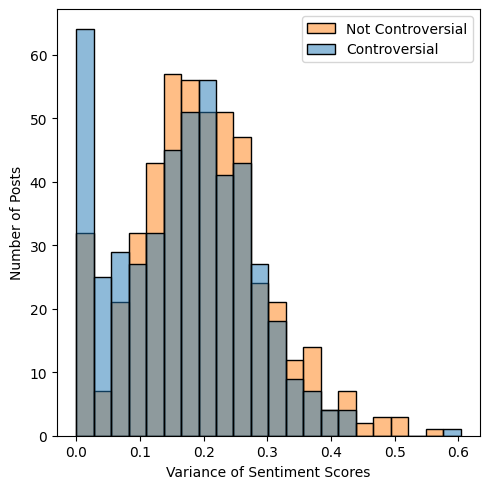

In [ ]:
ax = sns.displot(data=df, x="variance_in_1_hr", hue="is_controversial", legend=False)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
ax.set(xlabel='Variance of Sentiment Scores', ylabel='Number of Posts')
plt.legend(['Not Controversial', 'Controversial'])
plt.savefig('variance_controversy_graph.png')

In [ ]:
sns.displot(data=post_df, x="variance_in_3_hr", hue="is_controversial")

In [ ]:
sns.displot(data=post_df, x="variance_in_6_hr", hue="is_controversial")

In [ ]:
sns.scatterplot(data=post_df, x="upvote_ratio", y="variance_in_1_hr", hue="is_controversial")

In [ ]:
sns.scatterplot(data=df, x="rate_of_comments", y="num_comments", hue="is_controversial")

In [ ]:
sns.pairplot(post_df, vars=["vader_sentiment","variance_in_1_hr","variance_in_3_hr", "variance_in_6_hr"], hue="is_controversial")

# Calculating Rate of comments

In [ ]:
variance_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/post_with_variance.csv')
variance_df.head()

,submission_id,submission_title,submission_author,submission_created,submission_score,upvote_ratio,num_comments,is_controversial,created_date,vader_sentiment,variance_in_1_hr,variance_in_3_hr,variance_in_6_hr,text,nlp_text,rate_of_comments
0,19f5823,Where were you when the GTA 6 trailer dropped ...,ODB95,1.706174e+09,0,0.02,101,1,2024-01-25 09:05:29,0.0000,0.137036,0.243885,0.225930,Where were you when the GTA 6 trailer dropped ...,GTA 6 trailer dropped nowhere ? many times see...,0.089542
1,19dzivz,How are Nintendo and Square Enix not suing the...,shifty_coder,1.706045e+09,0,0.06,109,1,2024-01-23 21:27:52,0.2057,0.178178,0.215021,0.195316,How are Nintendo and Square Enix not suing the...,Nintendo Square Enix suing pants creators Palw...,0.127367
2,19e7f8g,Palworld or Valheim,GalexyGoose,1.706067e+09,0,0.06,24,1,2024-01-24 03:26:02,0.0000,0.412848,0.385076,0.309012,"Palworld or Valheim. I've played valheim, and ...","Palworld Valheim. 've play valheim , pretti fu...",0.006877
3,1acnwhp,"Is the Palworld situation comparable, in a way...",stronkzer,1.706397e+09,0,0.06,24,1,2024-01-27 23:15:13,-0.4215,0.287344,0.281706,0.303509,"Is the Palworld situation comparable, in a way...","Palworld situation comparable , way , Lies P D...",0.058007
4,19eqdo1,"Given the recent unfortunate discourse, I want...",LokiLunatic,1.706128e+09,0,0.07,19,1,2024-01-24 20:28:27,-0.6597,0.169652,0.204392,0.181746,"Given the recent unfortunate discourse, I want...","Given recent unfortunate discourse , want sett...",0.031536


In [ ]:
# Drop Duplicates??
variance_df.drop_duplicates(keep='last', subset=['submission_id'], inplace=True)

In [ ]:
def rate_of_comments(post_upload_time, number_of_comments, latest_comment):
  post_upload_time = post_upload_time.to_pydatetime()
  latest_comment = latest_comment.to_pydatetime()
  duration = latest_comment - post_upload_time
  return number_of_comments/(duration.total_seconds()/120) # Calculate Rate of Comments in


In [ ]:
def calculate_rate_of_comments():
  num_of_comments = []
  rate = []
  for id in variance_df['submission_id']:
    post = variance_df.loc[variance_df["submission_id"] == id]
    comment_id = 't3_' + id
    # Get Comments
    comments = comments_df.loc[comments_df["comment_link_id"] == comment_id]
    # Get Latest Comment
    latest_date = comments['created_date'].max()
    # Get Post Times
    num_of_comments.append(comments.shape[0])
    post_time = pd.to_datetime(post['created_date'].item())
    rate.append(rate_of_comments(post_time, comments.shape[0], latest_date))

  return [rate, num_of_comments]

In [ ]:
rate_and_comments = calculate_rate_of_comments()

In [ ]:
variance_df["rate_of_comments"] = rate_and_comments[0]
variance_df["num_comments"] = rate_and_comments[1]
variance_df.head()

,submission_id,submission_title,submission_author,submission_created,submission_score,upvote_ratio,num_comments,is_controversial,created_date,vader_sentiment,variance_in_1_hr,variance_in_3_hr,variance_in_6_hr,text,nlp_text,rate_of_comments
0,19f5823,Where were you when the GTA 6 trailer dropped ...,ODB95,1.706174e+09,0,0.02,101,1,2024-01-25 09:05:29,0.0000,0.137036,0.243885,0.225930,Where were you when the GTA 6 trailer dropped ...,GTA 6 trailer dropped nowhere ? many times see...,0.089542
1,19dzivz,How are Nintendo and Square Enix not suing the...,shifty_coder,1.706045e+09,0,0.06,109,1,2024-01-23 21:27:52,0.2057,0.178178,0.215021,0.195316,How are Nintendo and Square Enix not suing the...,Nintendo Square Enix suing pants creators Palw...,0.127367
2,19e7f8g,Palworld or Valheim,GalexyGoose,1.706067e+09,0,0.06,24,1,2024-01-24 03:26:02,0.0000,0.412848,0.385076,0.309012,"Palworld or Valheim. I've played valheim, and ...","Palworld Valheim. 've play valheim , pretti fu...",0.006877
3,1acnwhp,"Is the Palworld situation comparable, in a way...",stronkzer,1.706397e+09,0,0.06,24,1,2024-01-27 23:15:13,-0.4215,0.287344,0.281706,0.303509,"Is the Palworld situation comparable, in a way...","Palworld situation comparable , way , Lies P D...",0.058007
4,19eqdo1,"Given the recent unfortunate discourse, I want...",LokiLunatic,1.706128e+09,0,0.07,19,1,2024-01-24 20:28:27,-0.6597,0.169652,0.204392,0.181746,"Given the recent unfortunate discourse, I want...","Given recent unfortunate discourse , want sett...",0.031536


In [ ]:
variance_df.to_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/post_with_variance.csv', mode='w', index=False, header=True)

# Text Preprocessing
This is the section where for each cell I give a title along with all the comments and concatenate them all but also perform some shortening of the sentences and stop words etc.

In [ ]:
def concatenate_row(row):
  id = row["submission_id"]
  post_title = row["submission_title"]
  temp_df = comments_df.query('comment_link_id == @id')
  for comment in temp_df["comment_body"]:
    post_title = ". ".join([post_title, comment])
  return post_title

In [ ]:
variance_df["text"] = variance_df.apply(concatenate_row, axis=1)

In [ ]:
variance_df.to_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/post_with_variance.csv', header=True, index=False)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_preprocessing(sentence):
  filtered_sentence = []
  tokenized_sentence = word_tokenize(sentence)
  stop_word_removal = [w for w in tokenized_sentence if not w.lower() in stop_words]
  stem = [ps.stem(w) for w in stop_word_removal]
  return " ".join(stem)


In [ ]:
def nltk_column(row):
  id = row["submission_id"]
  post_title = row["submission_title"]
  post_title_tokenized = word_tokenize(post_title)
  s = [w for w in post_title_tokenized if not w.lower() in stop_words]
  post_title = " ".join(s)
  temp_df = comments_df.query('comment_link_id == @id')
  for comment in temp_df["comment_body"]:
    processed_comment = text_preprocessing(comment)
    post_title = ". ".join([post_title, processed_comment])
  return post_title

In [ ]:
variance_df["nlp_text"] = variance_df.apply(nltk_column, axis=1)

In [ ]:
comments_df['comment_link_id'] = comments_df['comment_link_id'].str.replace('t3_', '')

In [ ]:
variance_df.drop("nlp_text", inplace=True, axis=1)

# SVM with TF-IDF


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = variance_df["nlp_text"]
y = variance_df["is_controversial"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variance_df.nlp_text, variance_df.is_controversial, test_size=0.2, random_state=43, stratify=y)

In [ ]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('SVM', svm.LinearSVC())
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()), ('SVM', LinearSVC())])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       121
           1       0.75      0.72      0.74       122

    accuracy                           0.74       243
   macro avg       0.74      0.74      0.74       243
weighted avg       0.74      0.74      0.74       243



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt

In [ ]:
roc_auc_score(y_test, y_pred)

0.7408210269611164

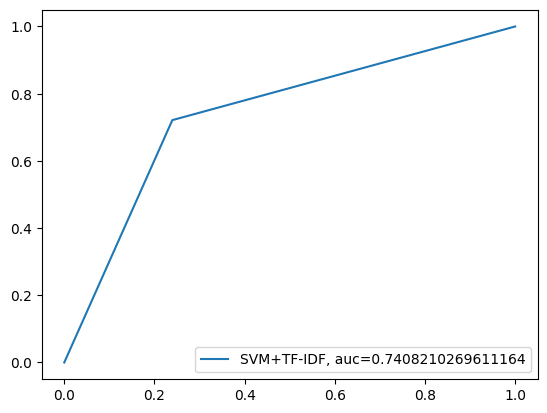

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="SVM+TF-IDF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

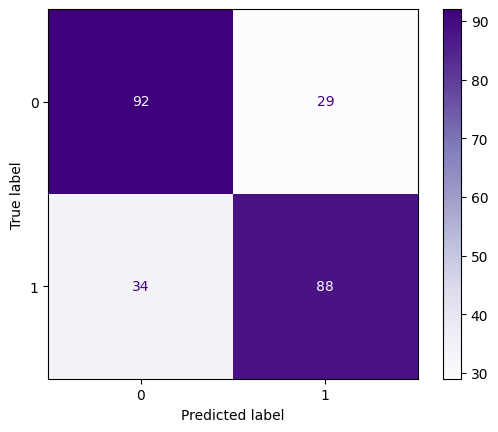

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Purples")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       124
           1       0.70      0.76      0.73       124

    accuracy                           0.72       248
   macro avg       0.72      0.72      0.72       248
weighted avg       0.72      0.72      0.72       248



In [ ]:
clf.score(X_test, y_test)

0.717741935483871

# Pipeline using TF-IDF + additional features and SVM

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
from sklearn.model_selection import KFold, cross_validate
import numpy as np

In [ ]:
# want to use tf-idf for nlp_text and then use additional features (variance and sentiment score)
X = variance_df[['num_comments',
        'vader_sentiment',
        'variance_in_3_hr',
        'nlp_text']]
y = variance_df['is_controversial']

In [ ]:
def get_text_data_func(x):
  return x['nlp_text']

def get_numeric_data_func(x):
  return x[['num_comments','variance_in_3_hr','vader_sentiment']]

In [ ]:
get_text_data = FunctionTransformer(get_text_data_func, validate=False)
get_numeric_data = FunctionTransformer(get_numeric_data_func, validate=False)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data)
            ])),
             ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vectorizer_tfidf', TfidfVectorizer( ))
            ]))
         ])),
    ('clf', svm.SVC(C=1, gamma=1, kernel='linear'))
])

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=43)

In [ ]:
scoring = ['f1', 'accuracy', 'precision', 'recall']
result = cross_validate(pipeline, X, y, cv=kfold, scoring=scoring); result

KeyboardInterrupt: 

In [ ]:
print(f"Accuracy: {np.mean(result['test_accuracy'])}\n" +
      f"Precision: {np.mean(result['test_precision'])}\n" +
      f"f1_score: {np.mean(result['test_f1'])}\n" +
      f"Recall: {np.mean(result['test_accuracy'])}\n")

Accuracy: 0.7868714496107722
Precision: 0.7455488581443719
f1_score: 0.8049105375882475
Recall: 0.7868714496107722



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function get_numeric_data_func at 0x7bd4b79a6050>))])),
                                                ('text_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function get_text_data_func at 0x7bd4b79a5fc0>)),
                                                                 ('vectorizer_tfidf',
                                                                  TfidfVectorizer())]))])),
                ('clf', SVC(C=1, gamma=1, kernel='linear'))])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80        97
           1       0.77      0.88      0.82        98

    accuracy                           0.81       195
   macro avg       0.82      0.81      0.81       195
weighted avg       0.82      0.81      0.81       195



In [ ]:
pipeline.score(X_test, y_test)

0.8102564102564103

### Confusion Matrix

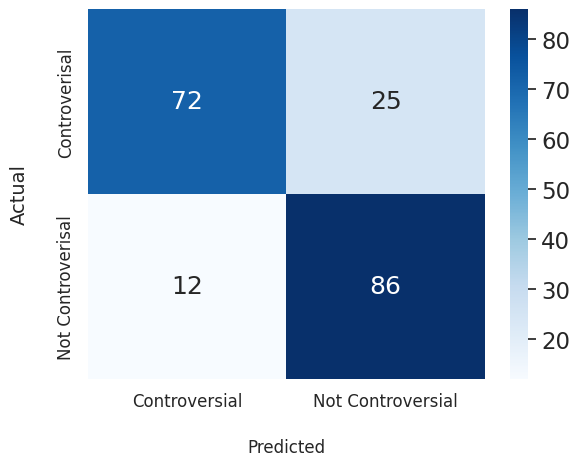

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="d")

# set x-axis label and ticks.
ax.set_xlabel("Predicted", fontsize=12, labelpad=20)
ax.xaxis.set_ticklabels(['Controversial', 'Not Controversial'], fontsize=12)

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Controverisal', 'Not Controverisal'], fontsize=12)
plt.savefig("confusionmatrixfortfidf.png")



In [ ]:
from sklearn.model_selection import GridSearchCV

## Hyper Parameter Tuning

In [ ]:
# Potential Classifiers
# Random Forest, SVM, Decision Tree

grid_param = {
    "clf__kernel" : ['linear', 'rbf'],
    "clf__C" : [1, 10, 100, 1000],
    "clf__gamma" : [1, 0.1, 0.01, 0.001, 0.0001]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline,
    verbose=3,
    n_jobs=-1,
    param_grid=grid_param
)

print("Performing grid search...")

Performing grid search...


In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numeric_features',
                                                                        Pipeline(steps=[('selector',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x7f919761c820>))])),
                                                                       ('text_features',
                                                                        Pipeline(steps=[('selector',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x7f91975edfc0>)),
                                                                                        ('vectorizer_tfidf',
                                                                                         TfidfVectorizer())]))])),
                                       ('clf',
                                        SVC(C=1, gamma=1, kernel='linear'))]),
             n_jobs=-1,
             param_grid={'clf__C': [1, 10, 100, 1000],
                         'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'clf__kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
with open(filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
0.7966178554558337


# Validation Set


In [ ]:
y_val_pred = pipeline.predict(X_val)
pipeline.score(X_val, y_val)

0.7635135135135135

In [ ]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73        74
           1       0.71      0.88      0.79        74

    accuracy                           0.76       148
   macro avg       0.78      0.76      0.76       148
weighted avg       0.78      0.76      0.76       148



# Conducting a test on Accuracy vs Time Exposed to a post


In [ ]:
comments_df["comment_link_id"] = comments_df["comment_link_id"].str.replace("t3_", ""); comments_df

# merge_df = pd.merge(post_df, comments_df, left_on='submission_id', right_on='comment_link_id', how='inner'); merge_df

,comment_id,comment_body,comment_author,comment_created,comment_score,comment_link_id,created_date
1,khvrqz5,I' think that it doesn't matter. People act as...,Send-Me-Tiddies-PLS,1.705273e+09,18.0,196si6i,2024-01-14 22:50:59
2,khvs6b8,An HD-2D remake with optional orchestral ost w...,wicktus,1.705273e+09,12.0,196si6i,2024-01-14 22:52:59
3,khvxwoh,I’d love a remake. \n\nIt won’t erase the prio...,GoldenTriforceLink,1.705275e+09,6.0,196si6i,2024-01-14 23:27:02
4,khvqh5q,I think a remake of and only if done right can...,PenguinsArmy2,1.705272e+09,4.0,196si6i,2024-01-14 22:44:11
5,khvt6au,"Agree, but a remake with Octopath Traveler sty...",Mastxadow,1.705273e+09,4.0,196si6i,2024-01-14 22:58:27
...,...,...,...,...,...,...,...
174158,ki7o8rm,They'd have to fix a decent amount to get me b...,stumpdawg,1.705454e+09,1.0,198g149,2024-01-17 01:07:48
174159,kidbfpg,You need to have the launcher connect to inter...,hater_roger,1.705540e+09,1.0,198g149,2024-01-18 01:14:03
174160,kibwy61,"Diablo 2, which version is the best",Just_a_random_guy77,1.705523e+09,1.0,198g149,2024-01-17 20:17:13
174161,kidg297,the 2nd is alot more likely than the first. \n...,Lyianx,1.705542e+09,1.0,198g149,2024-01-18 01:43:07


In [ ]:
# load model
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
"""
This is where we calculate accuracy of posts over time
"""
scoring = ['accuracy']

def concatenate_row(df, post_title):
  for comment in df["comment_body"]:
    post_title = ". ".join([post_title, comment])
  return post_title

def collect_filtered_comments(post, time_range):
  """
  This function collects all comments within the given time_frame
  """
  created_date = post.created_date
  added_time = created_date + pd.Timedelta(minutes=time_range)
  comments = comments_df.loc[comments_df["comment_link_id"] == post.submission_id]
  filtered_comments = comments[(comments["created_date"] >= created_date) & (comments["created_date"] <= added_time)]
  string = concatenate_row(filtered_comments, post.submission_title)
  return string

time = []
accuracy = []

for time_range in range(30, 1000 + 1, 30):
  filtered_df = post_df[["submission_id", "submission_title", "created_date", "is_controversial", "num_comments"]]
  filtered_df["text"] = filtered_df.apply(collect_filtered_comments, args=(time_range, ), axis=1)
  filtered_df["nlp_text"] = filtered_df.apply(nltk_column, axis=1)
  merged_df = pd.merge(filtered_df, variance_df[["vader_sentiment","variance_in_3_hr", "submission_id"]], on="submission_id", how="inner")
  merged_df.to_csv('test.csv')

  merged_df.dropna(subset='nlp_text', inplace=True)

  # Prepare data set to be inputted into pipeline
  X = merged_df[['num_comments',
      'vader_sentiment',
      'variance_in_3_hr',
      'nlp_text']]

  y = merged_df['is_controversial']
  result = cross_validate(pipeline, X, y, cv=kfold, scoring=scoring)
  print(np.mean(result['test_accuracy']))
  break

<ipython-input-62-5ed31bf2612d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["text"] = filtered_df.apply(collect_filtered_comments, args=(time_range, ), axis=1)
<ipython-input-62-5ed31bf2612d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["nlp_text"] = filtered_df.apply(nltk_column, axis=1)


0.8005151515151514


In [ ]:
lmao = pd.read_csv("test.csv")

lmao.dropna(subset='nlp_text', inplace=True)
lmao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 963
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        964 non-null    int64  
 1   submission_id     964 non-null    object 
 2   submission_title  964 non-null    object 
 3   created_date      964 non-null    object 
 4   is_controversial  964 non-null    int64  
 5   num_comments      964 non-null    int64  
 6   text              0 non-null      float64
 7   nlp_text          964 non-null    object 
 8   vader_sentiment   964 non-null    float64
 9   variance_in_3_hr  964 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 82.8+ KB


In [ ]:
# Prepare data set to be inputted into pipeline
X = lmao[['num_comments', # get this from a join
      'vader_sentiment', # get this from a join
      'variance_in_3_hr', # get this from a join
      'nlp_text']] #nlp_text we can run the existing function

y = lmao['is_controversial'] # we have this alr # this needs to be put into the pipeline...
accuracy = pipeline.score(X, y)
print(accuracy)

0.8340248962655602


In [ ]:
lmao.head()

,Unnamed: 0,submission_id,submission_title,created_date,is_controversial,num_comments,text,nlp_text,vader_sentiment,variance_in_3_hr
0,0,19f5823,Where were you when the GTA 6 trailer dropped ...,2024-01-25 09:05:29,1,71,NaN,GTA 6 trailer dropped nowhere ? many times see...,0.0000,0.243885
1,1,19dzivz,How are Nintendo and Square Enix not suing the...,2024-01-23 21:27:52,1,118,NaN,Nintendo Square Enix suing pants creators Palw...,0.2057,0.215021
2,2,19e7f8g,Palworld or Valheim,2024-01-24 03:26:02,1,21,NaN,"Palworld Valheim. 've play valheim , pretti fu...",0.0000,0.385076
3,3,1acnwhp,"Is the Palworld situation comparable, in a way...",2024-01-27 23:15:13,1,21,NaN,"Palworld situation comparable , way , Lies P D...",-0.4215,0.281706
4,4,19eqdo1,"Given the recent unfortunate discourse, I want...",2024-01-24 20:28:27,1,18,NaN,"Given recent unfortunate discourse , want sett...",-0.6597,0.204392


# Domain Transfer Task

In [ ]:
movies_df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/rmoviesdataset.csv')
movies_df.head()

<bound method NDFrame.head of          Unnamed: 0  register_index  post_id comment_id                author  \
0                 0     145z99zpost  145z99z        NaN         TheCarrzilico   
1                 1     145z5wopost  145z5wo        NaN               rjram02   
2                 2     145uxmqpost  145uxmq        NaN               ZThrock   
3                 3  145uxmqjnmysel  145uxmq    jnmysel               kytheon   
4                 4  145uxmqjnn2jr4  145uxmq    jnn2jr4  Consistent-Annual268   
...             ...             ...      ...        ...                   ...   
2399562     2399562     1bfl1n4post  1bfl1n4        NaN          AGreenJacket   
2399563     2399563     1bfkxdhpost  1bfkxdh        NaN            LunchyPete   
2399564     2399564  1bfkxdhkv1htd1  1bfkxdh    kv1htd1               cabose7   
2399565     2399565  1bfkxdhkv1oi3b  1bfkxdh    kv1oi3b          lonelygagger   
2399566     2399566  1bfkxdhkvcmaud  1bfkxdh    kvcmaud       Green-Equal7378   

                    datetime  \
0        2023-06-10 12:39:08   
1        2023-06-10 12:34:43   
2        2023-06-10 08:45:53   
3        2023-06-10 08:53:22   
4        2023-06-10 09:47:12   
...                      ...   
2399562  2024-03-15 18:37:13   
2399563  2024-03-15 18:32:08   
2399564  2024-03-15 20:03:57   
2399565  2024-03-15 20:43:00   
2399566  2024-03-17 22:58:59   

                                                     title  \
0        This old movie theater in Riverdale, MD still ...   
1                                 Death Note X John Wick 4   
2              Artificial Intelligence and Film Production   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
2399562  Were Wide Awake (2007) vs Awake (2007) made in...   
2399563  Joe Dante, Roger Corman & Brad Krevoy Team On ...   
2399564                                                NaN   
2399565                                                NaN   
2399566                                                NaN   

                                                       url  score  comments  \
0        https://www.reddit.com/r/movies/comments/145z99z/    2.0       0.0   
1        https://www.reddit.com/r/movies/comments/145z5wo/    0.0       0.0   
2        https://www.reddit.com/r/movies/comments/145uxmq/    3.0       6.0   
3                                                      NaN    7.0       NaN   
4                                                      NaN    2.0       NaN   
...                                                    ...    ...       ...   
2399562  https://www.reddit.com/r/movies/comments/1bfl1n4/    0.0       0.0   
2399563  https://www.reddit.com/r/movies/comments/1bfkxdh/    5.0       3.0   
2399564                                                NaN    8.0       NaN   
2399565                                                NaN    2.0       NaN   
2399566                                                NaN    1.0       NaN   

                                                      text  author_post_karma  \
0        This old movie theater in Riverdale  MD still ...           202882.0   
1          x200B    This was something that I felt when...               19.0   
2        Hello   I just want to learn from the perspect...               95.0   
3        The uncanny stuff you see is quickly made tras...           415219.0   
4        Animation  Vfx CGI  color grading  ADR voice r...            89388.0   
...                                                    ...                ...   
2399562  https   preview redd it 0ip108o7ljoc1 jpg widt...                NaN   
2399563  Joe Dante  Roger Corman   Brad Krevoy Team On ...                NaN   
2399564  Roger Corman will never die as long as he has ...                NaN   
2399565  Oh man  it s been forever since Joe Dante put ...                NaN   
2399566                    

In [ ]:
# Prepare code for input into model its going to be rough
# vader sentiment, variance, number of comments
movie_post_df = movies_df[movies_df["register_index"].str.contains('post')]

In [ ]:
movie_post_df = movie_post_df[["post_id", "datetime", "title", "score"]][0:1000]

In [ ]:
def obtain_upvotes(post_submission):
  post_id = post_submission["post_id"]
  post = reddit.submission(post_id)
  return post.upvote_ratio

movie_post_df["upvote_ratio"] = movie_post_df.apply(obtain_upvotes, axis=1)

In [ ]:
movie_post_df

In [ ]:
def get_num_of_comments(row):
  post_id = row["post_id"]
  p = movies_df.query('post_id == @post_id');
  return len(p) - 1

movie_post_df["num_comments"] = movie_post_df.apply(get_num_of_comments, axis=1)

In [ ]:
movie_post_df.head()

,post_id,datetime,title,score,upvote_ratio,num_comments
0,145z99z,2023-06-10 12:39:08,"This old movie theater in Riverdale, MD still ...",2.0,0.75,0
1,145z5wo,2023-06-10 12:34:43,Death Note X John Wick 4,0.0,0.33,0
2,145uxmq,2023-06-10 08:45:53,Artificial Intelligence and Film Production,3.0,0.56,5
36,144vcki,2023-06-09 04:37:48,Watched American Psycho and Wow,69.0,0.72,76
113,144vc0m,2023-06-09 04:37:01,If you like The Thing,39.0,0.73,30


In [ ]:
movie_post_df = movie_post_df.query('num_comments > 10')
movie_post_df = movie_post_df.sort_values(by=['upvote_ratio', 'score'])
movie_post_df.head()

,post_id,datetime,title,score,upvote_ratio,num_comments
25346,148g208,2023-06-13 13:56:50,Movie Villains who I don't see as Villains and...,0.0,0.13,44
22756,149jiu9,2023-06-14 21:20:35,"""Only in Cinemas"" why?",0.0,0.15,15
11113,146gz4x,2023-06-11 01:28:18,Why do most people like dramas?,0.0,0.18,25
32729,1496c58,2023-06-14 12:14:26,Do you think to be considered the GOAT the fil...,0.0,0.19,17
19131,147h03o,2023-06-12 06:35:38,Favourite cool/badass/iconic single character ...,0.0,0.21,18


In [ ]:
half = round(movie_post_df.index.size/2)
label = [0 if element > half else 1 for element in range(movie_post_df.index.size)]
movie_post_df["is_controversial"] = label

In [ ]:
movie_post_df

,post_id,datetime,title,score,upvote_ratio,num_comments,is_controversial
25346,148g208,2023-06-13 13:56:50,Movie Villains who I don't see as Villains and...,0.0,0.13,44,1
22756,149jiu9,2023-06-14 21:20:35,"""Only in Cinemas"" why?",0.0,0.15,15,1
11113,146gz4x,2023-06-11 01:28:18,Why do most people like dramas?,0.0,0.18,25,1
32729,1496c58,2023-06-14 12:14:26,Do you think to be considered the GOAT the fil...,0.0,0.19,17,1
19131,147h03o,2023-06-12 06:35:38,Favourite cool/badass/iconic single character ...,0.0,0.21,18,1
...,...,...,...,...,...,...,...
63428,14b3g2h,2023-06-16 17:57:29,Pixar Boss Pete Docter Admits the Studio ‘Trai...,3732.0,0.94,635,0
64487,14ay9ei,2023-06-16 14:26:08,Forty years ago WarGames captured moviegoers a...,3944.0,0.94,417,0
1833,145itkw,2023-06-09 22:26:18,‘Gladiator 2’ Stunt Accident Leaves Several Cr...,11677.0,0.94,522,0
46819,14ak5s7,2023-06-16 02:02:55,Official Discussion: Elemental [SPOILERS],157.0,0.96,591,0


In [ ]:
movie_post_df.to_csv('labelled_controversial_movie_posts.csv', index=False, header=True)

Perform Vader Variance and Vader Sentiment

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def return_sentiment_score(row):
  title = row["title"]
  return sia.polarity_scores(title)["compound"]

movie_post_df["vader_sentiment"] = movie_post_df.apply(return_sentiment_score, axis=1)
movie_post_df.head()

,post_id,datetime,title,score,upvote_ratio,num_comments,is_controversial,vader_sentiment
25346,148g208,2023-06-13 13:56:50,Movie Villains who I don't see as Villains and...,0.0,0.13,44,1,-0.9349
22756,149jiu9,2023-06-14 21:20:35,"""Only in Cinemas"" why?",0.0,0.15,15,1,0.0000
11113,146gz4x,2023-06-11 01:28:18,Why do most people like dramas?,0.0,0.18,25,1,0.4173
32729,1496c58,2023-06-14 12:14:26,Do you think to be considered the GOAT the fil...,0.0,0.19,17,1,0.4019
19131,147h03o,2023-06-12 06:35:38,Favourite cool/badass/iconic single character ...,0.0,0.21,18,1,0.0000


from matplotlib import pyplot as plt
_df_0['upvote_ratio'].plot(kind='hist', bins=20, title='upvote_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_comments'].plot(kind='hist', bins=20, title='num_comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['vader_sentiment'].plot(kind='hist', bins=20, title='vader_sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('post_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('datetime').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='upvote_ratio', y='num_comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='num_comments', y='vader_sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['num_comments']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('post_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='post_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('num_comments')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['num_comments']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('num_comments')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['num_comments']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('num_comments')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['vader_sentiment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('post_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='post_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('vader_sentiment')

from matplotlib import pyplot as plt
_df_12['upvote_ratio'].plot(kind='line', figsize=(8, 4), title='upvote_ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['num_comments'].plot(kind='line', figsize=(8, 4), title='num_comments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['vader_sentiment'].plot(kind='line', figsize=(8, 4), title='vader_sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['datetime'].value_counts()
    for x_label, grp in _df_15.groupby('post_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('post_id')
_ = plt.ylabel('datetime')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_16.groupby('datetime')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('datetime')
_ = plt.ylabel('title')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['post_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='upvote_ratio', y='post_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['datetime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='upvote_ratio', y='datetime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='upvote_ratio', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['post_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='num_comments', y='post_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_21['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['upvote_ratio'].plot(kind='hist', bins=20, title='upvote_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['num_comments'].plot(kind='hist', bins=20, title='num_comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['vader_sentiment'].plot(kind='hist', bins=20, title='vader_sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('post_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('datetime').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='index', y='upvote_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='upvote_ratio', y='num_comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='num_comments', y='vader_sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('post_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='post_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['num_comments']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_34.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('post_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='post_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('num_comments')

from matplotlib import pyplot as plt
_df_35['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['upvote_ratio'].plot(kind='line', figsize=(8, 4), title='upvote_ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['num_comments'].plot(kind='line', figsize=(8, 4), title='num_comments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['vader_sentiment'].plot(kind='line', figsize=(8, 4), title='vader_sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['datetime'].value_counts()
    for x_label, grp in _df_39.groupby('post_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('post_id')
_ = plt.ylabel('datetime')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_40.groupby('datetime')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('datetime')
_ = plt.ylabel('title')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['post_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='index', y='post_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_42['datetime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_42, x='index', y='datetime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='index', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['post_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='upvote_ratio', y='post_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
movie_post_df.to_csv('labelled_controversial_movie_posts.csv', index=False, header=True)

In [ ]:
import numpy as np

In [ ]:
def calculate_variance(row):
  compound_scores = []
  post_id = row["post_id"]
  comments = movies_df.query('post_id == @post_id');
  for comment in comments['text']:
    try:
      compound_scores.append(sia.polarity_scores(comment)["compound"])
    except AttributeError:
        print("Comment is an Error: ", comment)
        continue
  return np.var(compound_scores)

movie_post_df["vader_variance"] = movie_post_df.apply(calculate_variance, axis=1)

Comment is an Error:  nan
Comment is an Error:  nan


In [ ]:
movie_post_df.head()

,post_id,datetime,title,score,upvote_ratio,num_comments,is_controversial,vader_sentiment,vader_variance
25346,148g208,2023-06-13 13:56:50,Movie Villains who I don't see as Villains and...,0.0,0.13,44,1,-0.9349,0.309905
22756,149jiu9,2023-06-14 21:20:35,"""Only in Cinemas"" why?",0.0,0.15,15,1,0.0000,0.094088
11113,146gz4x,2023-06-11 01:28:18,Why do most people like dramas?,0.0,0.18,25,1,0.4173,0.314639
32729,1496c58,2023-06-14 12:14:26,Do you think to be considered the GOAT the fil...,0.0,0.19,17,1,0.4019,0.175399
19131,147h03o,2023-06-12 06:35:38,Favourite cool/badass/iconic single character ...,0.0,0.21,18,1,0.0000,0.205830


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


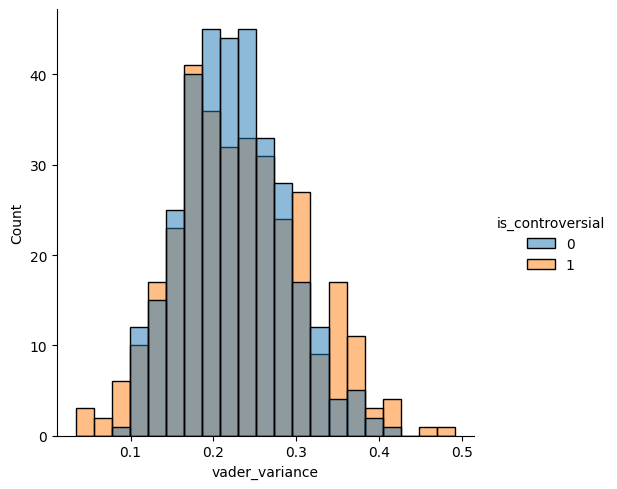

In [ ]:
sns.displot(data=movie_post_df, x="vader_variance", hue="is_controversial")

In [ ]:
movies_df.dropna(subset = ['text'], inplace=True)
movies_df.head()

,Unnamed: 0,register_index,post_id,comment_id,author,datetime,title,url,score,comments,text,author_post_karma,tag
0,0,145z99zpost,145z99z,NaN,TheCarrzilico,2023-06-10 12:39:08,"This old movie theater in Riverdale, MD still ...",https://www.reddit.com/r/movies/comments/145z99z/,2.0,0.0,This old movie theater in Riverdale MD still ...,202882.0,Poster
1,1,145z5wopost,145z5wo,NaN,rjram02,2023-06-10 12:34:43,Death Note X John Wick 4,https://www.reddit.com/r/movies/comments/145z5wo/,0.0,0.0,x200B This was something that I felt when...,19.0,Discussion
2,2,145uxmqpost,145uxmq,NaN,ZThrock,2023-06-10 08:45:53,Artificial Intelligence and Film Production,https://www.reddit.com/r/movies/comments/145uxmq/,3.0,6.0,Hello I just want to learn from the perspect...,95.0,Discussion
3,3,145uxmqjnmysel,145uxmq,jnmysel,kytheon,2023-06-10 08:53:22,NaN,NaN,7.0,NaN,The uncanny stuff you see is quickly made tras...,415219.0,Discussion
4,4,145uxmqjnn2jr4,145uxmq,jnn2jr4,Consistent-Annual268,2023-06-10 09:47:12,NaN,NaN,2.0,NaN,Animation Vfx CGI color grading ADR voice r...,89388.0,Discussion


0

In [ ]:
def concatenate_row(row):
  id = row["post_id"]
  post_title = ""
  temp_df = movies_df.query('post_id == @id')
  for comment in temp_df["text"]:
    post_title = ". ".join([post_title, comment])
  return post_title

In [ ]:
movie_post_df["text"] = movie_post_df.apply(concatenate_row, axis=1)

In [ ]:
movie_post_df

,post_id,datetime,title,score,upvote_ratio,num_comments,is_controversial,vader_sentiment,vader_variance,text
25346,148g208,2023-06-13 13:56:50,Movie Villains who I don't see as Villains and...,0.0,0.13,44,1,-0.9349,0.309905,. these are some Villains who have good qualit...
22756,149jiu9,2023-06-14 21:20:35,"""Only in Cinemas"" why?",0.0,0.15,15,1,0.0000,0.094088,. You re kinda retarded huh . Why do studios ...
11113,146gz4x,2023-06-11 01:28:18,Why do most people like dramas?,0.0,0.18,25,1,0.4173,0.314639,. Most dramas I ve watched are painfully borin...
32729,1496c58,2023-06-14 12:14:26,Do you think to be considered the GOAT the fil...,0.0,0.19,17,1,0.4019,0.175399,. No . The elitist will go to the technical st...
19131,147h03o,2023-06-12 06:35:38,Favourite cool/badass/iconic single character ...,0.0,0.21,18,1,0.0000,0.205830,. Hey I was just wondering what single charac...
...,...,...,...,...,...,...,...,...,...,...
63428,14b3g2h,2023-06-16 17:57:29,Pixar Boss Pete Docter Admits the Studio ‘Trai...,3732.0,0.94,635,0,-0.3182,0.263058,. I thought Fast and the Furious were the movi...
64487,14ay9ei,2023-06-16 14:26:08,Forty years ago WarGames captured moviegoers a...,3944.0,0.94,417,0,-0.7096,0.203980,. The climax has to be one of the best countdo...
1833,145itkw,2023-06-09 22:26:18,‘Gladiator 2’ Stunt Accident Leaves Several Cr...,11677.0,0.94,522,0,-0.4767,0.156211,. Stop making this movie. No cast members we...
46819,14ak5s7,2023-06-16 02:02:55,Official Discussion: Elemental [SPOILERS],157.0,0.96,591,0,0.0000,0.297471,. I was just thinking about Dr No when I read...


In [ ]:
def nltk_column(row):
  id = row["post_id"]
  post_title = ""
  temp_df = movies_df.query('post_id == @id')
  for comment in temp_df["text"]:
    processed_comment = text_preprocessing(comment)
    post_title = ". ".join([post_title, processed_comment])
  return post_title

In [ ]:
movie_post_df["nlp_text"] = movie_post_df.apply(nltk_column, axis=1)

In [ ]:
movie_post_df.head()

,post_id,datetime,title,score,upvote_ratio,num_comments,is_controversial,vader_sentiment,vader_variance,text,nlp_text
25346,148g208,2023-06-13 13:56:50,Movie Villains who I don't see as Villains and...,0.0,0.13,44,1,-0.9349,0.309905,. these are some Villains who have good qualit...,. villain good qualiti villain wiki dr octaviu...
22756,149jiu9,2023-06-14 21:20:35,"""Only in Cinemas"" why?",0.0,0.15,15,1,0.0000,0.094088,. You re kinda retarded huh . Why do studios ...,. kinda retard huh. studio put tag end trailer...
11113,146gz4x,2023-06-11 01:28:18,Why do most people like dramas?,0.0,0.18,25,1,0.4173,0.314639,. Most dramas I ve watched are painfully borin...,. drama watch pain bore best exampl parasit an...
32729,1496c58,2023-06-14 12:14:26,Do you think to be considered the GOAT the fil...,0.0,0.19,17,1,0.4019,0.175399,. No . The elitist will go to the technical st...,. . elitist go technic stuff bore dri audienc ...
19131,147h03o,2023-06-12 06:35:38,Favourite cool/badass/iconic single character ...,0.0,0.21,18,1,0.0000,0.205830,. Hey I was just wondering what single charac...,. hey wonder singl charact scene everyon think...


In [ ]:
movie_post_df.to_csv('gdrive/MyDrive/Colab Notebooks/Dissertation/labelled_controversial_movie_posts.csv', index=False, header=True)

NameError: name 'movie_post_df' is not defined

In [ ]:
movie_post_df.drop("nlp_text", inplace=True, axis=1)

In [ ]:
movie_post_df = pd.read_csv("gdrive/MyDrive/Colab Notebooks/Dissertation/labelled_controversial_movie_posts.csv")

In [ ]:
movie_post_df.head()

,post_id,datetime,title,score,upvote_ratio,num_comments,is_controversial,vader_sentiment,vader_variance,text,nlp_text
0,148g208,2023-06-13 13:56:50,Movie Villains who I don't see as Villains and...,0.0,0.13,44,1,-0.9349,0.309905,. these are some Villains who have good qualit...,. villain good qualiti villain wiki dr octaviu...
1,149jiu9,2023-06-14 21:20:35,"""Only in Cinemas"" why?",0.0,0.15,15,1,0.0000,0.094088,. You re kinda retarded huh . Why do studios ...,. kinda retard huh. studio put tag end trailer...
2,146gz4x,2023-06-11 01:28:18,Why do most people like dramas?,0.0,0.18,25,1,0.4173,0.314639,. Most dramas I ve watched are painfully borin...,. drama watch pain bore best exampl parasit an...
3,1496c58,2023-06-14 12:14:26,Do you think to be considered the GOAT the fil...,0.0,0.19,17,1,0.4019,0.175399,. No . The elitist will go to the technical st...,. . elitist go technic stuff bore dri audienc ...
4,147h03o,2023-06-12 06:35:38,Favourite cool/badass/iconic single character ...,0.0,0.21,18,1,0.0000,0.205830,. Hey I was just wondering what single charac...,. hey wonder singl charact scene everyon think...


In [ ]:
movie_post_df.rename(columns={"vader_variance": "variance_in_3_hr"}, inplace=True)

In [ ]:
X = movie_post_df[['num_comments',
        'vader_sentiment',
        'variance_in_3_hr',
        'nlp_text']]
y = movie_post_df['is_controversial']

In [ ]:
y_pred = pipeline.predict(X)

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       329
           1       0.71      0.72      0.71       331

    accuracy                           0.71       660
   macro avg       0.71      0.71      0.71       660
weighted avg       0.71      0.71      0.71       660



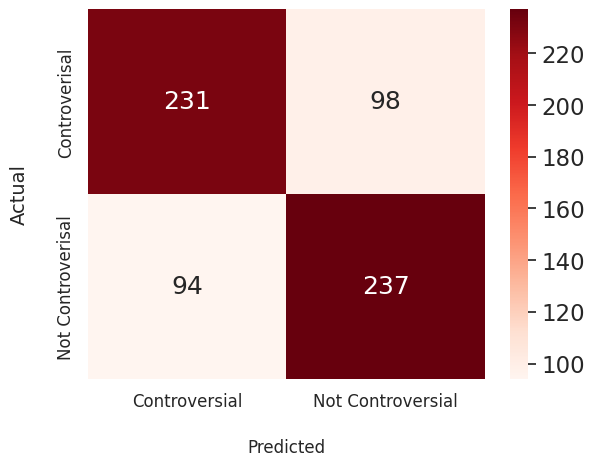

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred)
ax = plt.subplot()
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, ax=ax, cmap="Reds", fmt="d")

# set x-axis label and ticks.
ax.set_xlabel("Predicted", fontsize=12, labelpad=20)
ax.xaxis.set_ticklabels(['Controversial', 'Not Controversial'], fontsize=12)

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Controverisal', 'Not Controverisal'], fontsize=12)
plt.savefig("confusionmatrixfortfidf.png")

In [ ]:
ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap="Reds")

NameError: name 'ConfusionMatrixDisplay' is not defined

In [ ]:
X = movie_post_df['nlp_text']
y = movie_post_df['is_controversial']

In [ ]:
y_pred = clf.predict(X)

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       329
           1       0.73      0.61      0.66       331

    accuracy                           0.69       660
   macro avg       0.69      0.69      0.69       660
weighted avg       0.69      0.69      0.69       660



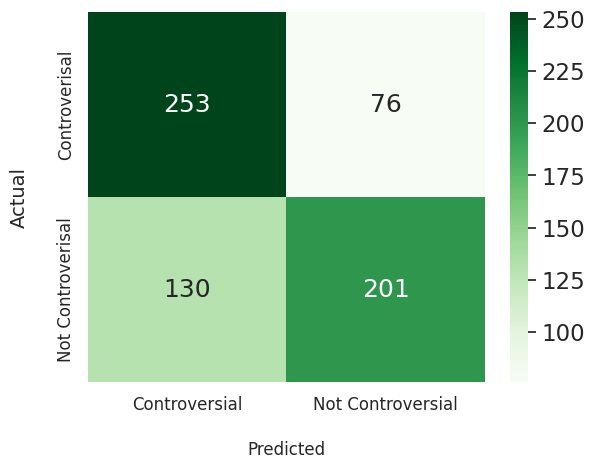

In [ ]:
cm = confusion_matrix(y, y_pred)
ax = plt.subplot()
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, ax=ax, cmap="Greens", fmt="d")

# set x-axis label and ticks.
ax.set_xlabel("Predicted", fontsize=12, labelpad=20)
ax.xaxis.set_ticklabels(['Controversial', 'Not Controversial'], fontsize=12)

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Controverisal', 'Not Controverisal'], fontsize=12)
plt.savefig("tfidfmatrix.png")

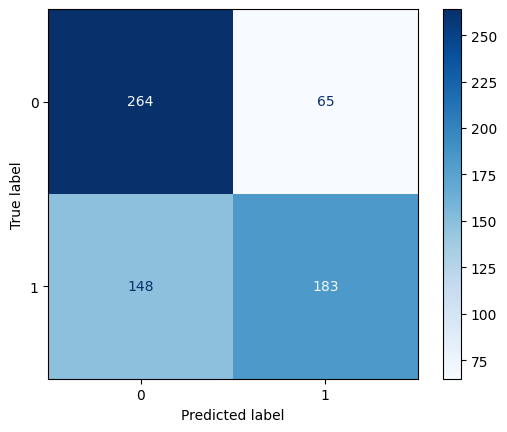

In [ ]:
ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap="Blues")